In [ ]:
ȁсновы статистики.
Центральная
предельная теорема

In [ ]:
Пример: Есть школа с 1 000 учеников, и нужно опросить 100 из них. Можно присвоить каждому ученику
номер от 1 до 1 000 и использовать генератор случайных чисел для выбора 100 номеров.
Студенты, соответствующие этим номерам, и будут выборкой.

In [ ]:
Стратифицированная случайная выборка - Предполагает разделение генеральной
совокупности на подгруппы (страты) на основе
общих характеристик (например, возраст, пол,
уровень дохода), а затем случайную выборку из
каждой страты.

In [ ]:
Пример: Нужно изучить средний балл студентов колледжа на разных специальностях. Можно разделить
студентов на страты в зависимости от их специальности (наука, искусство, инженерное дело), а
затем случайным образом отобрать студентов из каждой специальности.

In [ ]:
Пример: Нужно исследовать домохозяйства в городе, можно разделить город
на районы (кластеры) и случайным образом выбрать несколько районов.
Затем опросить все домохозяйства в этих выбранных районах.

In [ ]:
Пример: Есть список из 1 000 сотрудников и нужно отобрать выборку из 100 человек, можно задать
интервал (k) равным 10. Если случайное начало равно 3, выбрать 3-го, 13-го, 23-го и так далее.

In [ ]:
Центральная предельная теорема (ЦПТ) - Это фундаментальный принцип в области
статистики, служащий краеугольным камнем для
инференциальной статистики, которая предполагает
составление прогнозов или выводов о совокупности
на основе выборки данных.

In [ ]:
Если взять достаточно большие случайные выборки из генеральной совокупности,
то распределение выборочных средних будет приближаться к нормальному
распределению (колоколообразной кривой), независимо от формы
распределения исходной генеральной совокупности.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [10]:
# Параметры генеральной совокупности
mu = 50
sigma = 10

# Функция для генерации случайных выборок и вычисления выборочных средних
def generate_sample_means(sample_size, num_samples):
    sample_means = []
    for _ in range(num_samples):
        sample = np.random.normal(mu, sigma, sample_size)
        sample_means.append(np.mean(sample))
    return sample_means

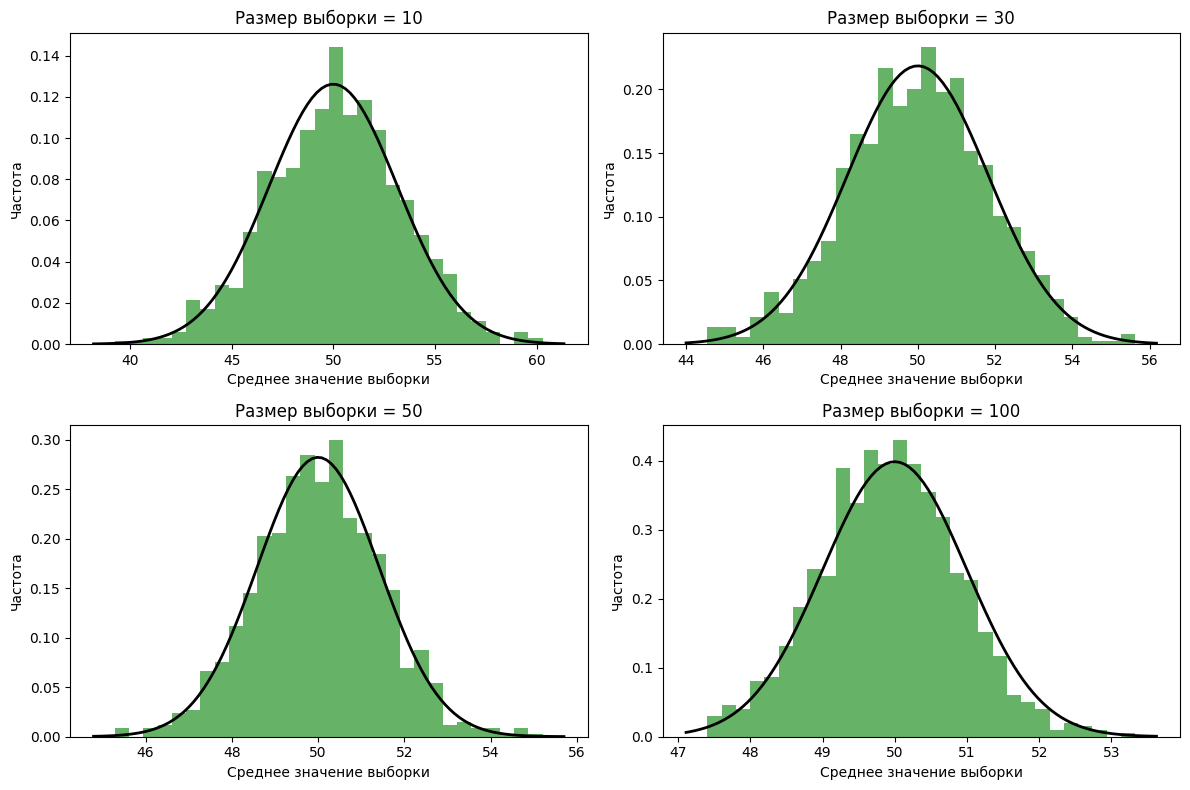

In [11]:
# Параметры для моделирования
sample_sizes = [10, 30, 50, 100]
num_samples = 1000



# Построение графиков выборочных распределений
plt.figure(figsize=(12, 8))

# для каждого размера выборки 
for i, sample_size in enumerate(sample_sizes):
    # берем выборку 1000 раз и находим их средние
    sample_means = generate_sample_means(sample_size, num_samples)
    plt.subplot(2, 2, i+1)
    plt.hist(sample_means, bins=30, density=True, alpha=0.6, color='g')
    plt.title(f'Размер выборки = {sample_size}')
    plt.xlabel('Среднее значение выборки')
    plt.ylabel('Частота')
    # Постройте график нормального распределения для сравнения
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, sigma/np.sqrt(sample_size))
    plt.plot(x, p, 'k', linewidth=2)

plt.tight_layout()
plt.show()

In [ ]:
Предположим, что генеральная совокупность имеет среднее значение (𝜇), равное 100, и стандартное отклонение
(𝜎), равное 15. Вы берете выборку из 36 наблюдений и хотите найти вероятность того, что среднее значение
выборки находится в диапазоне от 95 до 105.

In [ ]:
from scipy.stats import norm
import numpy as np

mu = 100
sigma = 15
n = 36
sem = sigma / np.sqrt(n)

z_score_lower = (95 - mu) / sem
z_score_upper = (105 - mu) / sem

probability_lower = norm.cdf(z_score_lower)
probability_upper = norm.cdf(z_score_upper)

probability_between = probability_upper - probability_lower
print(f"Вероятность того, что выборочное среднее находится в диапазоне от 95 до 105, равна примерно {probability_between:.4f}")

In [ ]:
Что известное про среднее выборки?
mean(среднего для выборок) = 100
SEM = 15/sqrt(36) = 2.5 -- стандартная ошибка = стандартное отклонение для среднего выборки

было [50, 60, 70, 80] // сто штук
65 -- среднее
отклонение -15, -5, +5, 15

выборки:
(50, 60), (50, 70), (50, 80), (60, 70), (60, 80), (70, 80) // одну выборку из 36 наблюдений
Среднее каждой выбрки:
55, 60, 65, 65, 70, 75
======================
65 -- среднее (от средних выборок)
отклонение -10, -5, 0, 0, 5, 10

новые выборки:
(50, 60, 70), (50, 60, 80), (50, 70, 80), (60, 70, 80)
среднее каждой выборки 60, 63, 67, 70
======================
65 -- среднее средних выборок
отклонение -5, -2, +2, 5

In [ ]:
1. Учитывая выборку из 50 растений со средней высотой выборки 19.24 дюйма и известным стандартным
отклонением популяции в 10 дюймов, рассчитайте 95% доверительный интервал для средней высоты
популяции.


ЦПТ: среднее выборок
-- нормально распределены
-- среднее = среднее ген совокупности
-- ст.откл = (ст откл ген совокупности) / (корень из размера выборок 50)

In [8]:
import numpy as np
import scipy.stats as st


sample_mean = 19.24
population_std = 10
sample_size = 50
confidence_level = 0.95

z_critical = st.norm.ppf((1 + confidence_level) / 2) # перцентиль 0.975 -- расстояние от центра
margin_of_error = z_critical * (population_std / np.sqrt(sample_size)) # z-score * SEM

ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error
print(f"95% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")

95% Confidence Interval: (16.47, 22.01)
